# Rehnquist Court Analysis (symmetrized data, 3/16/2018)

## Correlation matrix

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sup_court_data = pd.read_csv("SCDB_2018_02_justiceCentered_Citation.csv",encoding = "ISO-8859-1")

is_rehnquist = ((sup_court_data['term'].astype(int) > 1994) & (sup_court_data['term'].astype(int) < 2005))
rehnquist_data = sup_court_data[is_rehnquist]

In [3]:
justices = ['JPStevens',
            'RBGinsburg',
            'DHSouter',
            'SGBreyer',
            'SDOConnor',
            'AMKennedy',
            'WHRehnquist',
            'AScalia',
            'CThomas']

In [4]:
to_ising = lambda x: 2 * (x - 1.0) - 1.0
voting_data = rehnquist_data.pivot(columns="justiceName", index="caseId", values="direction")
voting_data = voting_data[justices]
voting_data = voting_data.transform(to_ising)
voting_data = voting_data.dropna(0)

In [5]:
states = list(voting_data.iterrows())

In [6]:
C = np.zeros((9,9))

In [7]:
states = [list(i[1]) for i in states]

In [8]:
def cij(states, i, j):
    count = 0.
    for state in states:
        count += state[i] * state[j] * 1.0
    return count / len(states)

In [9]:
for i in range(9):
    for j in range(9):
        C[i][j] = cij(states, i, j)

In [10]:
def fij(states, i, j):
    count = 0.
    for state in states:
        if state[i] == 1 and state[j] == 1:
            count += 1.
    return count / len(states)

def fi(states, i):
    count = 0.
    for state in states:
        if state[i] == 1: count += 1.
    return count/len(states)

In [11]:
for i in range(9):
    for j in range(i, 9):
        pij = fij(states, i, j)
        pj = fi(states, j)
        pi = fi(states, i)
        val = (pij - pi*pj)/np.sqrt(pi*(1-pi)*pj*(1-pj))
        C[i][j] = val
        C[j][i] = val

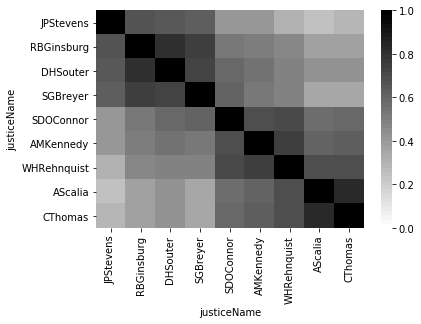

In [12]:
corr = voting_data.corr()
gs = sns.cubehelix_palette(50, hue=0.01, rot=0, light=1.0, dark=0.0)
sns.heatmap(corr, cmap=gs, xticklabels=corr.columns, yticklabels=corr.columns,  vmin=0.0, vmax=1.0)
np.savetxt("scotus_correlation.csv", corr, delimiter=',')

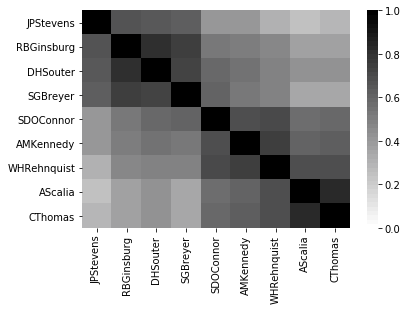

In [13]:
sns.heatmap(C, cmap=gs, xticklabels=corr.columns, yticklabels=corr.columns,  vmin=0.0, vmax=1.0)

## Extracting $J_{ij}$

In [26]:
import itertools
import scipy
from copy import deepcopy

In [27]:
def plot_heatmap(J):
    J_ = deepcopy(J)
    if J_.shape != (9,9): J_ = J_.reshape((9,9))
    cm = sns.diverging_palette(248, 12, sep=1, n=256)
    sns.heatmap(J_, cmap=cm, xticklabels=justices, yticklabels=justices,  vmin=-1, vmax=1)

In [16]:
all_scotus_states = np.array(list(itertools.product([-1,1], repeat=9)))
np.savetxt("all_scotus_states.csv", all_scotus_states, delimiter=",")

In [27]:
eng = matlab.engine.start_matlab()
eng.find_j_matrix(nargout=0)
eng.quit()

In [31]:
J_matrix_ = pd.read_csv("roots.csv",encoding = "ISO-8859-1", header=None)

In [21]:
J_matrix

,0,1,2,3,4,5,6,7,8
0,0.000000,0.403520,0.31349,0.377520,-0.027277,0.211580,-0.30625,-0.231980,0.243880
1,0.403520,0.000000,0.73102,0.479190,-0.152070,0.023625,0.28026,0.063100,-0.079214
2,0.313490,0.731020,0.00000,0.318650,0.244200,0.134510,-0.14219,0.065490,0.254400
3,0.377520,0.479190,0.31865,0.000000,0.573560,0.097610,0.16598,0.069685,-0.492030
4,-0.027277,-0.152070,0.24420,0.573560,0.000000,0.304020,0.43581,0.134780,0.160510
5,0.211580,0.023625,0.13451,0.097610,0.304020,0.000000,0.58932,0.154980,0.189520
6,-0.306250,0.280260,-0.14219,0.165980,0.435810,0.589320,0.00000,0.245970,0.443090
7,-0.231980,0.063100,0.06549,0.069685,0.134780,0.154980,0.24597,0.000000,0.991430
8,0.243880,-0.079214,0.25440,-0.492030,0.160510,0.189520,0.44309,0.991430,0.000000


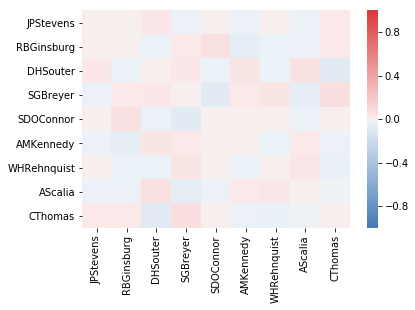

In [33]:
plot_heatmap(J_matrix_ - J_matrix)

In [29]:
state = np.random.choice([-1,1], size=9)